In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
heart_data = pd.read_csv('D:\All resume projects\heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
correlation = heart_data.corr()

corr calculates the relationship between each column in your data set

<AxesSubplot:>

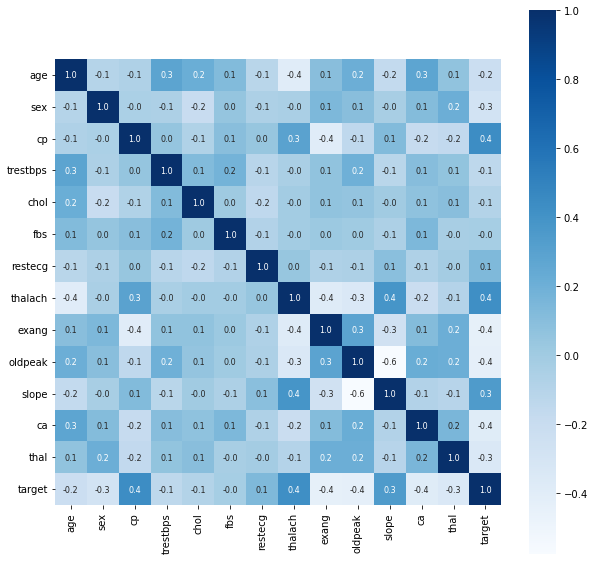

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',cmap='Blues',annot = True,annot_kws={'size':8})

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


returns description of the data in the DataFrame

In [10]:
heart_data['target'].value_counts()
# 1 --> Defective Heart
# 2 --> Healthy Heart

1    165
0    138
Name: target, dtype: int64

 value_counts() returns object containing counts of unique values

In [11]:
x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [12]:
x.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=2)

 stratify ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.
 test_size is the number that defines the size of the test set
 The random state is simply the lot number of the set generated randomly in any operation.

In [14]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

c:\Users\Saee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
x_train_data_prediction = model.predict(x_train)
prediction = accuracy_score(y_train,x_train_data_prediction)

In [18]:
print(prediction)

0.8512396694214877


In [19]:
x_test_prediction = model.predict(x_test)
test_prediction = accuracy_score(y_test,x_test_prediction)

In [20]:
print(test_prediction)

0.819672131147541


In [21]:
#Predictive system
input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 1:
    print('Heart Disease')
else:
    print('Healthy Heart')

[0]
Healthy Heart


c:\Users\Saee\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
